## Synthetic Data

##### 1. 
Creating 3 by 2 matrix A - Gaussian distr. entries mean 0, variance 1

In [140]:
import numpy as np
from IPython.display import display
from numpy import linalg as LA

# 3 by 2 matrix - Gaussian distr. entries mean 0, variance 1
mean = 0
var = 1
sigma = math.sqrt(var)
A = np.matrix(sigma * np.random.randn(3,2) + mean)

Verifying matrix rank(A)

In [141]:
display('Rank(A) = ', LA.matrix_rank(A))

'Rank(A) = '

2

### Generation of Dataset #1
$\bullet$ Generating $X$: 500 data samples using $X$ = $AV$

In [165]:
# 2 by 500 random Gaussian matrix V - each entry 2 dim row vector
mean = 0
sigma = 1
V = np.matrix(sigma * np.random.randn(2,500) + mean)
X = A.dot(V)

$\bullet$ Confirming dim($X$) = $3$ by $500$

In [166]:
# We expect X data matrix to be dim 3 by 500
display('Dim(X) = ', X.shape)

'Dim(X) = '

(3, 500)

$\bullet$ Discussing expected $rank(X) = 2$ from $X = AV$.
Since $rank(A)$ is the dim of the column space of A, and the product of $Ab$ ($b$ is a column vector) is a column vector that lies in column space of A, then all columns of $AB$ must also be in the column space of $A$

In [167]:
display('Rank(X) = ', LA.matrix_rank(X))

'Rank(X) = '

2

### Singular Value and Eigenvalue Decomposition of Dataset #1

##### 1.
Computing SVD($X$) and eigenvalue decomp($XX^{T}$)

In [168]:
# SVD(X)
U, S, Vtrans = LA.svd(X, full_matrices=True)
# U left sv, S singular values

# eigendecomp(XXT)
w, v = LA.eig(X.dot(X.transpose()))
# w eigenvalues, v eigenvectors

$\bullet$ Verifying left singular vectors U correspond to eigenvectors of $XX^{T}$.Python equal to conditional is false but we see they are equal in magnitude

In [169]:
display('U = ', U)
display('Eigenvectors = ', v)

'U = '

matrix([[-0.92777871, -0.36382031, -0.08283388],
        [ 0.15129405, -0.5697302 ,  0.80778562],
        [-0.34108178,  0.73691403,  0.58362739]])

'Eigenvectors = '

matrix([[ 0.92777871, -0.36382031, -0.08283388],
        [-0.15129405, -0.5697302 ,  0.80778562],
        [ 0.34108178,  0.73691403,  0.58362739]])

$\bullet$ Attempt to show eigenvalues of $XX^{T}$ are square of singular values of $X$. Here Python conditional shows false, we will display both vectors to show they are mostly close to being equal.

In [170]:
display('Eigenvalues = ', w)
display('Squared singular values = ', np.square(S))

'Eigenvalues = '

array([1.28415866e+03, 6.71712788e+01, 9.41600319e-15])

'Squared singular values = '

array([1.28415866e+03, 6.71712788e+01, 8.64295331e-31])

$\bullet$ Attempt to show $\|X\|^{2}_F$ equal to sum of squares of singular values of $X$

In [171]:
display('Frobenius norm of X squared = ', np.square(LA.norm(X,'fro')))
display('Sum of squared singular values X = ', np.sum(np.square(S)))

'Frobenius norm of X squared = '

1351.3299418672739

'Sum of squared singular values X = '

1351.329941867274

##### 2.

In [172]:
display('Singular values S = ', S)

'Singular values S = '

array([3.58351596e+01, 8.19580861e+00, 9.29674852e-16])

$\bullet$ From the rank, we expect to see two nonzero singular values and one zero singular value above. However, the third singular value is not exactly zero. Numpy SVD uses a full matrix decomp and a particular internal routine causing precision errors. Knowing that these singular values can come from square rooting the non-zero eigenvalues of $XX^{T}$ - but perhaps not in this particular SVD routine - can give some insight on why there might be precision inaccuracy.

$\bullet$ U corresponds to the left singular vectors of A. S is a vector from the diagonal of the true sigma matrix of the SVD of A, it holds the singular values. These singular values are ordered from the largest to smallest, where for instance the first singular value corresponds to the first top principal component in U (first column). Second largest singular value in S corresponds to second principal component from U, etc.

### PCA of Dataset #1
##### 1.

Since we know rank(X) = 2, our entire dataset spans only 2 dim space meaning 2 principal components should be enough to capture most variation in the data. 

##### 2.

$\bullet$ Showing $E[x_{k}] = 0$ , $k$ = $1,2,3$

In [173]:
display(np.mean(X[:,0]))
display(np.mean(X[:,1]))
display(np.mean(X[:,2]))

-0.36511792802251336

0.3348879157639391

-0.05142559780866481

$\bullet$ Computing mean vector $m$ from data matrix $X$

In [174]:
# 500 elements - mean of each column vector from X
# Mean vector, axis = 1 row, 0 col
mean_vector = np.mean(X, axis = 0)

display('Mean vector from X = ', mean_vector)

'Mean vector from X = '

matrix([[-3.65117928e-01,  3.34887916e-01, -5.14255978e-02,
          2.49289353e-01, -5.52200451e-01, -9.07003842e-02,
         -3.94813065e-01, -3.98674397e-01, -1.21589859e-01,
         -5.01234402e-01,  5.14434354e-01,  2.29725013e-01,
          7.24462274e-01,  1.14536790e+00,  5.97785819e-01,
         -9.42423501e-01, -8.50301790e-01, -2.28347853e-01,
          1.04184093e+00, -8.73448817e-01, -1.44279116e+00,
          7.63522700e-01,  1.28834877e-01,  4.15779953e-01,
          6.67843853e-01,  2.74104418e-01,  3.09246483e-01,
          1.47925167e-01, -7.61553638e-01, -6.09866729e-01,
          5.83012008e-01, -6.26742387e-01, -9.82305740e-01,
          5.62250413e-01, -1.09655078e-01, -3.63036851e-01,
          5.41601506e-01, -2.03260666e-01,  2.96240519e-01,
          9.79630870e-01, -1.27001683e+00,  6.67641507e-02,
         -5.02753185e-01,  1.61317217e-01,  3.34685835e-01,
         -1.49276517e-01,  8.64537021e-01, -7.05405841e-01,
          1.21917149e+00,  9.80003533e-0

##### 3.

Since the singular values of $S$ are ordered in decreasing order, where the first singular value is the greatest and corresponds to the first singular vector of $U$ - if we want the top two principal components we simply truncate the first two columns of $U$

In [176]:
Uk = np.zeros((3,2))
u1 = U[:,0]
u2 = U[:,1]
Uk[:,0] = U[:,0].transpose()
Uk[:,1] = U[:,1].transpose()
display('Top 2 principal components = ', Uk)

'Top 2 principal components = '

array([[-0.92777871, -0.36382031],
       [ 0.15129405, -0.5697302 ],
       [-0.34108178,  0.73691403]])

##### 4.
Computing feature vector $\tilde{x_{i}}$ = $(u_{k})^{T}x_{i}$ from top two principal components.

In [177]:
x_tilde = Uk.transpose().dot(X)
display('Feature vectors = ', x_tilde)
# We expect dimension 2 by 500
display('Dimension = ', x_tilde.shape)


'Feature vectors = '

matrix([[ 9.61788059e-01, -9.28243710e-01,  1.70468111e-01,
         -6.86240441e-01,  1.46768200e+00,  2.27221167e-01,
          1.03441442e+00,  1.14103555e+00,  3.15833874e-01,
          1.24678584e+00, -1.42045336e+00, -6.07164170e-01,
         -1.85434262e+00, -2.92730628e+00, -1.72898479e+00,
          2.58492362e+00,  2.41878882e+00,  6.20657593e-01,
         -2.79187083e+00,  2.33755431e+00,  3.80451831e+00,
         -2.02493863e+00, -3.21950096e-01, -1.15103736e+00,
         -1.70832900e+00, -7.96739383e-01, -8.04137533e-01,
         -3.45211466e-01,  2.05827417e+00,  1.72997942e+00,
         -1.51325816e+00,  1.71537337e+00,  2.63773497e+00,
         -1.52413039e+00,  3.19911157e-01,  9.05751217e-01,
         -1.47638877e+00,  4.52463780e-01, -8.43298003e-01,
         -2.66245492e+00,  3.50673971e+00, -1.98181851e-01,
          1.35328559e+00, -4.97169187e-01, -1.02010807e+00,
          3.51758996e-01, -2.27810533e+00,  1.89506626e+00,
         -3.25882920e+00, -2.08205474e-0

'Dimension = '

(2, 500)

$\bullet$ Approximation of original data samples $x_{i}$ using $\hat{x_{i}}$ = $U\tilde{x_{i}}$

In [178]:
x_hat = Uk.dot(x_tilde)
display('Approximated data = ', x_hat)
display('Dimension approximated data = ', x_hat.shape)

'Approximated data = '

matrix([[-0.93024064,  0.80068362, -0.0911184 , ..., -0.76968756,
          0.30216318, -0.45520306],
        [ 0.08614053, -0.23521177,  0.13077048, ..., -0.32788806,
         -0.34764308,  0.0914235 ],
        [-0.25125368,  0.43919189, -0.19392888, ...,  0.34458124,
          0.52405086, -0.19114392]])

'Dimension approximated data = '

(3, 500)

$\bullet$ Verifying representation error $\|\hat{X}-X\|^{2}_F$ is not zero

In [179]:
display('Representation error = ', np.square(LA.norm(x_hat - X,'fro')))

'Representation error = '

2.529419189681315e-29

##### 5.

Computing feature vectors $\tilde{x}_{i}$ from $x_{i}$ by projecting onto top principal component of $X$

In [180]:
Uk_top = np.zeros((3,1))
Uk_top[:,0] = U[:,0].transpose()
x1_tilde = Uk_top.transpose().dot(X)
display('Feature vectors = ', x1_tilde)
# We expect dimension 1 by 500
display('Dimension = ', x1_tilde.shape)

'Feature vectors = '

matrix([[ 9.61788059e-01, -9.28243710e-01,  1.70468111e-01,
         -6.86240441e-01,  1.46768200e+00,  2.27221167e-01,
          1.03441442e+00,  1.14103555e+00,  3.15833874e-01,
          1.24678584e+00, -1.42045336e+00, -6.07164170e-01,
         -1.85434262e+00, -2.92730628e+00, -1.72898479e+00,
          2.58492362e+00,  2.41878882e+00,  6.20657593e-01,
         -2.79187083e+00,  2.33755431e+00,  3.80451831e+00,
         -2.02493863e+00, -3.21950096e-01, -1.15103736e+00,
         -1.70832900e+00, -7.96739383e-01, -8.04137533e-01,
         -3.45211466e-01,  2.05827417e+00,  1.72997942e+00,
         -1.51325816e+00,  1.71537337e+00,  2.63773497e+00,
         -1.52413039e+00,  3.19911157e-01,  9.05751217e-01,
         -1.47638877e+00,  4.52463780e-01, -8.43298003e-01,
         -2.66245492e+00,  3.50673971e+00, -1.98181851e-01,
          1.35328559e+00, -4.97169187e-01, -1.02010807e+00,
          3.51758996e-01, -2.27810533e+00,  1.89506626e+00,
         -3.25882920e+00, -2.08205474e-0

'Dimension = '

(1, 500)

$\bullet$ Approximation of original data samples $x_{i}$ using $\hat{x_{i}}$ = $u_{1}\tilde{x_{i}}$

In [181]:
x1_hat = Uk_top.dot(x1_tilde)
display('Approximated data = ', x1_hat)
display('Dimension approximated data = ', x1_hat.shape)

'Approximated data = '

matrix([[-0.89232648,  0.86120475, -0.15815668, ..., -0.50745954,
          0.47472682, -0.46514672],
        [ 0.14551281, -0.14043775,  0.02579081, ...,  0.08275207,
         -0.0774143 ,  0.07585206],
        [-0.32804838,  0.31660702, -0.05814357, ..., -0.18655872,
          0.1745251 , -0.17100314]])

'Dimension approximated data = '

(3, 500)

$\bullet$ Comparing $\|\hat{X}-X\|^{2}_F$ to square of second largest singular value of $X$

In [182]:
display('Representation error = ', np.square(LA.norm(x1_hat - X,'fro')))
display('Second largest singular value of X = ', np.square(S[1]))

'Representation error = '

67.17127882063318

'Second largest singular value of X = '

67.17127882063318

$\bullet$ 3D scatterplot for original data $x_{i}$

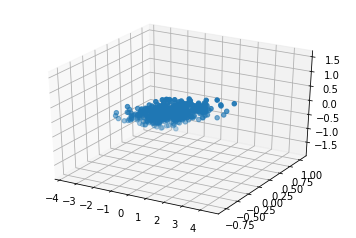

In [198]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xorig_data = X[0,:]
yorig_data = X[1,:]
zorig_data = X[2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xorig_data, yorig_data, zorig_data)
plt.show()

3D scatterplot for reconstructed data $\hat{x_{i}}$

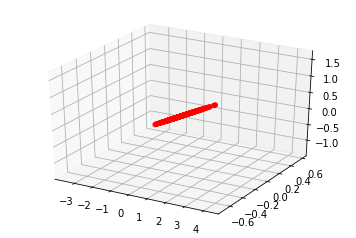

In [199]:
xrec_data = x1_hat[0,:]
yrec_data = x1_hat[1,:]
zrec_data = x1_hat[2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xrec_data, yrec_data, zrec_data, c = 'r', marker ='o')
plt.show()

### Generation of Dataset #2
##### 1.
Creating Gaussian distr. vector $c$ with mean = $0$, variance = $3$

In [200]:
import math
# 3 by 1 vector
mean = 0
var = 3
sigma = math.sqrt(var)
c = np.array(sigma * np.random.randn(3,1) + mean)
display('Vector c = ', c)

'Vector c = '

array([[ 0.75612378],
       [-0.64363371],
       [-1.69723509]])

##### 2.
Matrix $V$ composed of vectors $v$ with Gaussian distr. entries, mean = $0$ and variance = $1$

In [201]:
mean = 0
var = 1
sigma = math.sqrt(var)
V2 = np.matrix(sigma * np.random.randn(2,500) + mean)

$\bullet$ Matrix $X$ using $X$ = $AV$ + $c$

In [202]:
X2 = A*V2 + c
display('Matrix X = ', X2)

'Matrix X = '

matrix([[ 1.47702333, -0.63391762, -1.26636381, ..., -0.0270133 ,
          1.2547852 ,  0.36304959],
        [-0.83591671, -0.37911001, -0.09123054, ..., -0.28578945,
         -0.63182284, -0.59906926],
        [-1.32878365, -2.26064416, -2.7488544 , ..., -2.30366949,
         -1.64280753, -1.81470453]])

$\bullet$ Notice rank($X$) has increased due to shift by vector $c$

In [203]:
display('rank(X) = ', LA.matrix_rank(X2))

'rank(X) = '

3

### PCA, Centering, and Dataset #2
##### 1.
$\bullet$ Computing the top two principal components of dataset without centering

In [204]:
# SVD of second dataset
U, S, Vtrans = LA.svd(X2, full_matrices=True)
# Computing top two principal components
Uk = np.zeros((3,2))
u1 = U[:,0]
u2 = U[:,1]
Uk[:,0] = u1.transpose()
Uk[:,1] = u2.transpose()
display('Top 2 principal components = ', Uk)

'Top 2 principal components = '

array([[-0.55014156, -0.79715771],
       [ 0.32533492,  0.06976071],
       [ 0.76909131, -0.59972746]])

$\bullet$ Reconstructing approximate data of $x_{i}$ using $\hat{x_{i}}$ = $UU^{T}x_{i}$

In [205]:
Uk_trans = Uk.transpose()
X_approx = Uk.dot(Uk_trans).dot(X2)
display('Approximate data = ', X_approx)
display('Dimension of approximate data matrix = ', X_approx.shape)

'Approximate data = '

matrix([[ 1.50867667, -0.63001644, -1.3176943 , ..., -0.08492685,
          1.23505164,  0.3813675 ],
        [-0.71592462, -0.36432134, -0.28581522, ..., -0.50532929,
         -0.70662923, -0.52962937],
        [-1.35689969, -2.26410938, -2.70326014, ..., -2.25222784,
         -1.62527921, -1.83097539]])

'Dimension of approximate data matrix = '

(3, 500)

$\bullet$ Computing representation error $\|\hat{X}-X\|^{2}_F$ and noticing not close to being zero

In [206]:
display('Representation error = ', np.square(LA.norm(X_approx - X2,'fro')))

'Representation error = '

44.390474405129865

$\bullet$ Repeating using centered data: computing mean vector $m$ from $X$

In [209]:
# 500 elements - mean of each column vector from X
# Mean vector, axis = 1 row, 0 col
mean_vector = np.mean(X2, axis = 0)

$\bullet$ Computing top 2 principal components of centered data

In [210]:
# SVD of second dataset
U, S, Vtrans = LA.svd(X2 - mean_vector, full_matrices=True)
# Computing top two principal components
Uk = np.zeros((3,2))
u1 = U[:,0]
u2 = U[:,1]
Uk[:,0] = u1.transpose()
Uk[:,1] = u2.transpose()
display('Top 2 principal components of centered data = ', Uk)

'Top 2 principal components of centered data = '

array([[-0.79696013,  0.17754214],
       [ 0.24472406, -0.77895879],
       [ 0.55223607,  0.60141665]])

$\bullet$ Reconstructing approximate using centered data matrix $X$: $\hat{x_{i}}$ = $UU^{T}(x_{i}-m)+m$

In [211]:
Uk_trans = Uk.transpose()
Xcentered_approx = Uk.dot(Uk_trans).dot(X2 - mean_vector) + mean_vector
display('Approximate data = ', Xcentered_approx)
display('Dimension of approximate data matrix = ', Xcentered_approx.shape)

'Approximate data = '

matrix([[ 1.47702333, -0.63391762, -1.26636381, ..., -0.0270133 ,
          1.2547852 ,  0.36304959],
        [-0.83591671, -0.37911001, -0.09123054, ..., -0.28578945,
         -0.63182284, -0.59906926],
        [-1.32878365, -2.26064416, -2.7488544 , ..., -2.30366949,
         -1.64280753, -1.81470453]])

'Dimension of approximate data matrix = '

(3, 500)

$\bullet$ Computing almost zero representation error of centered data $\|\hat{X}-X\|^{2}_F$ 

In [212]:
display('Representation error = ', np.square(LA.norm(Xcentered_approx - X2,'fro')))

'Representation error = '

9.131296089526537e-29

### Generation of Dataset #3
##### 1.
Generating matrices $V$ and $N$ with Gaussian Distr. entries

In [76]:
# Matrix V
v_mean = 0
v_var = 1
v_sigma = math.sqrt(v_var)
V = np.array(v_sigma * np.random.randn(2,500) + v_mean)

# Matrix N
n_mean = 0
n_var = 0.01
n_sigma = math.sqrt(n_var)
N = np.array(n_sigma * np.random.randn(3,500) + n_mean)

$\bullet$ Generating X: 500 data samples using $X$ = $AV$ + $N$ where V, N are random

In [213]:
X3 = A.dot(V) + N
display('Matrix X = ', X3)
display('Dimension X = ', X3.shape)

'Matrix X = '

matrix([[-1.10495071e+00,  7.17256116e-01, -1.31428604e-01, ...,
         -7.38532370e-01,  3.27726167e-01, -4.70917989e-01],
        [-1.01343499e-01, -2.88587729e-01,  2.77148142e-01, ...,
         -4.05706892e-01, -2.86006467e-01,  1.32203542e-02],
        [-1.82753812e-01,  3.56714669e-01, -8.25502797e-04, ...,
          4.11899304e-01,  3.99246592e-01, -1.82690583e-01]])

'Dimension X = '

(3, 500)

$\bullet$ Transforming data samples into normalized variants using $\check{x}$ = $x_{i}/\|\hat{x_{i}}\|_{2}$

In [214]:
two_norm_X = LA.norm(X3, 2)
norm_variants_X = X3 / two_norm_X
display('Normalized variants = ', norm_variants_X)

'Normalized variants = '

matrix([[-3.08716937e-02,  2.00397275e-02, -3.67204035e-03, ...,
         -2.06341739e-02,  9.15648249e-03, -1.31571805e-02],
        [-2.83147965e-03, -8.06297683e-03,  7.74336128e-03, ...,
         -1.13352195e-02, -7.99085784e-03,  3.69369168e-04],
        [-5.10603744e-03,  9.96640472e-03, -2.30640781e-05, ...,
          1.15082320e-02,  1.11547224e-02, -5.10427086e-03]])

$\bullet$ Data no longer lies in 2-dimensional subspace due to noise. Verifying through rank($\check{X}$) and singular values of $\check{X}$

In [215]:
U, S, Vtrans = LA.svd(norm_variants_X, full_matrices=True)
display('rank(normalized X) = ', LA.matrix_rank(norm_variants_X))
display('Singular values of normalized X = ', S)

'rank(normalized X) = '

3

'Singular values of normalized X = '

array([1.        , 0.2368998 , 0.06154916])

### PCA Denoising of Dataset #3
##### 1.
Plotting normalized data samples $\check{x_{i}}$

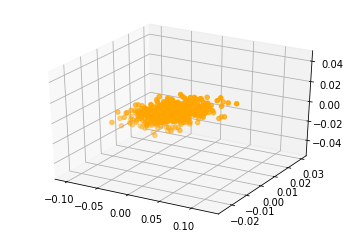

In [216]:
x_norm = norm_variants_X[0,:]
y_norm = norm_variants_X[1,:]
z_norm = norm_variants_X[2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_norm, y_norm, z_norm, color = 'orange')
plt.show()

##### 2.
Denoising normalized data samples using top 2 principal components from $\check{X}$

In [217]:
# Computing top two principal components
Uk = np.zeros((3,2))
u1 = U[:,0]
u2 = U[:,1]
Uk[:,0] = u1.transpose()
Uk[:,1] = u2.transpose()
Uk_trans = Uk.transpose()
X_denoised = Uk.dot(Uk_trans).dot(norm_variants_X)
display('Denoised normalized data samples = ', X_denoised)

'Denoised normalized data samples = '

matrix([[-0.03108311,  0.01986239, -0.00320712, ..., -0.02074264,
          0.0090825 , -0.01326975],
        [-0.00032334, -0.00595911,  0.00222772, ..., -0.01004841,
         -0.00711312,  0.00170481],
        [-0.00342335,  0.01137788, -0.00372347, ...,  0.01237154,
          0.01174359, -0.00420833]])

##### 3.
Plotting denoised normalized data samples $\check{x_{i}}$

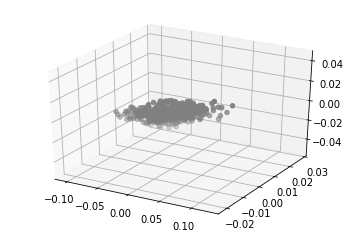

In [218]:
x_denoised = X_denoised[0,:]
y_denoised = X_denoised[1,:]
z_denoised = X_denoised[2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_denoised, y_denoised, z_denoised, color = 'gray')
plt.show()

##### 4.
Verifying representation error of normalized data $\check{X}$ and denoised version $\hat{X}$ is given by the square of the third singular value of $\check{X}$

In [219]:
# Representation error
display('Representation error = ', np.square(LA.norm(norm_variants_X - X_denoised,'fro')))
# Third singular value squared
display('Third singular value squared = ', np.square(S[2]))

'Representation error = '

0.003788298861346898

'Third singular value squared = '

0.0037882988613468973

## Real Data
Loading handwritten digit '0' real world data

In [84]:
from sklearn.datasets import load_digits
images, labels = load_digits(1, return_X_y=True)

##### 1. 
Displaying 10th image from dataset: 8x8 grayscale image using matplotlib.pyplot

<Figure size 432x288 with 0 Axes>

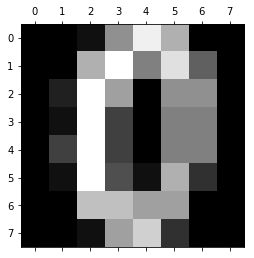

In [220]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[10]) 
plt.show() 

#####  2. 
Getting data ready for PCA by mean centering then displaying mean vector as grayscale image

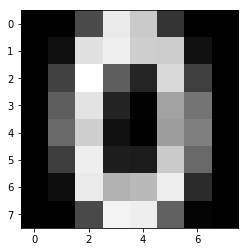

In [221]:
# Transposing s.t data samples are columns
image_data = images.transpose()
# Mean vector, axis = 1 row, 0 col
mean_vector = np.mean(image_data, axis = 1)
# Numpy array to matrix for grayscale image
mean_matrix = np.reshape(mean_vector,(-1,8))

# Display mean_vector as grayscale image 
imgplot = plt.imshow(mean_matrix, cmap='gray')

# Mean centering data
centered_image_data = image_data.transpose() - mean_vector
centered_image_data = centered_image_data.transpose()

##### 3. 
Computing SVD of mean centered data $\bar{X}$

In [222]:
U, S, Vtrans = LA.svd(centered_image_data, full_matrices=True)

$\bullet$ Plotting the singular values of $\bar{X}$ on log scale

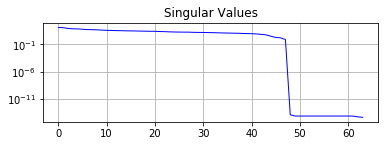

In [223]:
plt.subplot(2,1,1)
plt.plot(S, color='blue', lw=1)
plt.yscale('log')
plt.grid(True)
plt.title("Singular Values")
plt.show()

$\bullet$ Finding smallest integer k

In [224]:
# Frobenius norm squared
fro_sq = np.square(LA.norm(centered_image_data,'fro'))
# Squared singular values
squared_S = np.square((S))

# Iterative approach
for k in range(len(squared_S)):
    if(sum(squared_S[0:k]/fro_sq) >= 0.9):
        print('Smallest k = ', k)
        break

Smallest k =  18


##### 4.
Computing top $k$ = $18$ principal components of $\bar{X}$

In [225]:
# Truncating for 18 cols
Uk = U[:, 0:18]
display('Dimension of Uk = ', Uk.shape)

'Dimension of Uk = '

(64, 18)

$\bullet$ Displaying first principal component as grayscale image

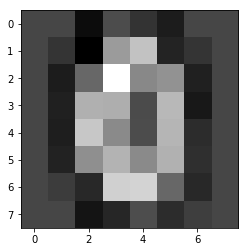

In [226]:
u1 = Uk[:,0]
# Matrix for grayscale display
u1_mat = np.reshape(u1,(-1,8))
# Display first pc as grayscale image 
imgplot = plt.imshow(u1_mat, cmap='gray')

##### 5.
Projecting mean centered image onto top three principal components of $\bar{X}$

In [227]:
u3 = Uk[:,0:3]
Xproj = u3.transpose().dot(centered_image_data)

$\bullet$ 3D scatterplot of three dimensional feature vectors

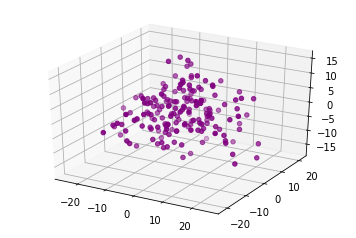

In [228]:
x = Xproj[0,:]
y = Xproj[1,:]
z = Xproj[2,:]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, color = 'purple')
plt.show()

$\bullet$ Reconstructing original images from feature vectors using $\hat{X}$ = $U_{k}\tilde{X}$ , $k$ = $3$

In [229]:
Xapprox = u3.dot(Xproj)
display('Reconstructed original image samples = ', Xapprox)

'Reconstructed original image samples = '

array([[ 4.31088284e-16, -8.80808410e-16, -2.88197968e-16, ...,
         1.17672938e-15, -1.33531540e-15,  1.01641091e-15],
       [ 4.87366605e-03, -1.29293389e-02, -2.17690003e-02, ...,
        -9.50744532e-03, -8.06539655e-03, -2.78957146e-02],
       [ 1.68523075e+00, -3.04322696e+00, -2.14148833e+00, ...,
         2.61849496e+00, -4.55938851e+00,  1.36174225e+00],
       ...,
       [-2.27253407e+00, -1.76808076e+00, -3.24210256e-01, ...,
        -5.34092701e-01,  4.74989673e+00, -4.36757924e+00],
       [-2.40374537e-01, -1.87742837e-01, -1.38550138e-01, ...,
        -2.05757760e-01,  5.49841131e-01, -6.96672620e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Computing representation error $\|\hat{X}-X\|^{2}_F$ also noticing the squared sum of 14 largest singular values from centered data is close to the representation error

In [231]:
display('Representation error = ', np.square(LA.norm(Xapprox - image_data,'fro')))
# Sum of 14 largest singular values from mean centered data
display('Squared sum of 14 largest singular values from centered data = ', np.square(sum(S[0:12])))

'Representation error = '

618642.6342012428

'Squared sum of 14 largest singular values from centered data = '

592905.7227357388

$\bullet$ Displaying reconstructed version of the image from Part 1

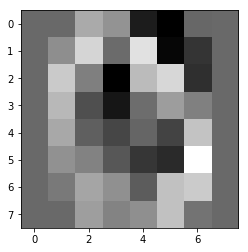

In [232]:
# Used tenth image from dataset
image = Xapprox[:,10]

# Numpy array to matrix for grayscale image
image_matrix = np.reshape(image,(-1,8))

# Display reconstructed grayscale image 
imgplot = plt.imshow(image_matrix, cmap='gray')